In [1]:
# %matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
from datetime import datetime
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine,reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [11]:
# Collect the names of tables within the database
inspector.get_table_names()

['measurement', 'station']

In [12]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [14]:
conn = engine.connect()

In [15]:
ms_df = pd.read_sql('select * from measurement;',conn)
ms_df

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [16]:
s_df = pd.read_sql('select * from station;',conn)
s_df

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


# Exploratory Climate Analysis

In [17]:
last_day = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_day[0])
first_day =dt.date(2017,8,23)-dt.timedelta(days=365)
print(first_day)
# Perform a query to retrieve the data and precipitation scores
# ***only select the all the prcp measurement of the day as the instruction indicated, but the bar chart doesn't match with the example.
ms_ls3 = session.query(Measurement.date,Measurement.prcp).\
filter(Measurement.date>=first_day).\
order_by(Measurement.date).all()
ms_df3 = pd.DataFrame(ms_ls3,columns=['Date','Precipitation'])
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
# Sort the dataframe by date
ms_df3=ms_df3.sort_values('Date')
ms_df3.set_index(['Date'],inplace=True)
ms_df3

2017-08-23
2016-08-23


,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.08
2017-08-23,0.00


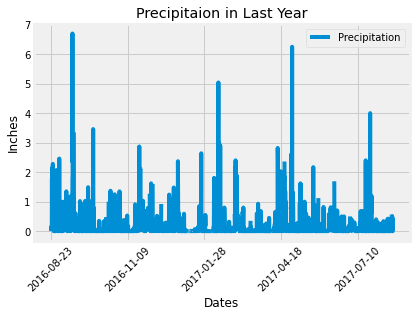

In [18]:
ms_df3.plot(rot=45)
plt.ylabel('Inches')
plt.xlabel('Dates')
plt.title('Precipitaion in Last Year')
plt.show()

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
ms_df3.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [20]:
# Design a query to show how many stations are available in this dataset?
station_num = session.query(func.count(Station.id)).first()[0]
print(f'There are {station_num} stations availabel.')

There are 9 stations availabel.


In [21]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
sc_df=session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
print(f'Station {sc_df[0][0]} is the most active one with {sc_df[0][1]} records')
sc_df

Station USC00519281 is the most active one with 2772 records


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
tob_ls_t = session.query(func.max(Measurement.tobs),func.min(Measurement.tobs),func.avg(Measurement.tobs)).\
filter(Measurement.date>='2016-08-23').\
filter(Measurement.station =='USC00519281').all()[0]
tob_ls_t
print(f'The highest temperature recorded is {tob_ls_t[0]} F, the lowest temperature recorded isn {tob_ls_t[1]} F and the average temperture recorded is {round(tob_ls_t[2],2)} F.')

The highest temperature recorded is 83.0 F, the lowest temperature recorded isn 59.0 F and the average temperture recorded is 73.11 F.


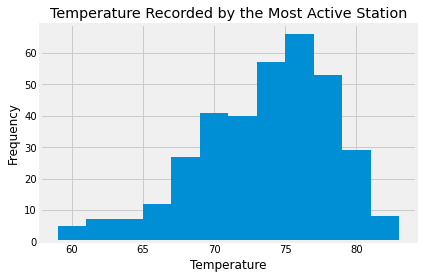

In [23]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tob_ls = session.query(Measurement.tobs).\
filter(Measurement.date>='2016-08-23').\
filter(Measurement.station =='USC00519281').\
order_by(Measurement.tobs).all()
tob_df = pd.DataFrame(tob_ls)
tob_df.hist(bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Recorded by the Most Active Station')
plt.show()

## Bonus Challenge Assignment

In [24]:
# (Pandas method)
#Identify the average temperature in June at all stations across all available years in the dataset. Do the same for December temperature.

ms_df = pd.read_sql('select * from measurement;',conn)
filt= ms_df['date'].str.contains('-12-')
ms_dec_df = ms_df.loc[filt]
filt= ms_df['date'].str.contains('-06-')
ms_jun_df = ms_df.loc[filt]
ms_jun_avg = round(ms_jun_df['tobs'].mean(),2)
ms_dec_avg = round(ms_dec_df['tobs'].mean(),2)
print(f'The average temperature for June is {ms_jun_avg} F and the average temperature for December is {ms_dec_avg} F.')

The average temperature for June is 74.94 F and the average temperature for December is 71.04 F.


In [25]:
## https://stackoverflow.com/questions/14524322/how-to-convert-a-date-string-to-different-format
# ms_df = pd.read_sql('select * from measurement;',conn)
# ms_df['date'] = [datetime.strptime(d,'%Y-%m-%d').strftime('%b-%d %y') for d in ms_df['date']]
# filt= ms_df['date'].str.contains('Dec')
# ms_df.loc[filt]

In [26]:
# (SQLAlchemy method)
#Identify the average temperature in June at all stations across all available years in the dataset. Do the same for December temperature. 

ms_jun_avg = round(session.query(func.avg(Measurement.tobs)).\
filter(Measurement.date.contains('-06-')).first()[0],2)
ms_dec_avg = round(session.query(func.avg(Measurement.tobs)).\
filter(Measurement.date.contains('-12-')).first()[0],2)
print(f'The average temperature for June is {ms_jun_avg} F and the average temperature for December is {ms_dec_avg} F.')

The average temperature for June is 74.94 F and the average temperature for December is 71.04 F.


#### Use the t-test to determine whether the difference in the means, if any, is statistically significant. Will you use a paired t-test, or an unpaired t-test? Why?

#### Answer: unpaired t-test was used, for they are two different groups of data.

In [27]:
import scipy.stats as stats
st = stats.ttest_ind(ms_dec_df['tobs'], ms_jun_df['tobs'], equal_var=False)
print(f'The difference between two set of temp data is statistically significant with a low p value ({st[1]}).')

The difference between two set of temp data is statistically significant with a low p value (4.193529835915755e-187).


In [28]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    result= session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
    filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()[0]
    return result

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

(62.0, 69.57142857142857, 74.0)


In [29]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
temps = calc_temps('2014-08-15', '2014-08-26')
temps

(69.0, 76.15116279069767, 84.0)

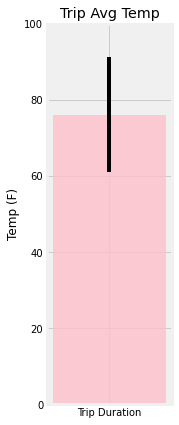

In [30]:
# Plot the results from your previous query as a bar chart. 
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
yerror=temps[2]-temps[0]
# Use the average temperature for the y value
fig, ax = plt.subplots(figsize=(2,7))
ax.bar('Trip Duration',temps[1],color='pink',alpha=0.8,yerr=yerror)
plt.ylim(0,100)
plt.ylabel('Temp (F)')
# Use "Trip Avg Temp" as your Title
plt.title('Trip Avg Temp')
plt.show()

In [31]:
# (SQLAlchemy method)
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
def calc_rainfall(start_date, end_date):
    sel=[Measurement.station,Station.name,Station.latitude,Station.longitude,Station.elevation,func.sum(Measurement.prcp)]
    rainfall_ls = session.query(*sel).group_by(Measurement.station).filter(Measurement.station == Station.station).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).order_by(func.sum(Measurement.prcp).desc()).all()
    rainfall_df = pd.DataFrame(rainfall_ls,columns=['station','name','latitude','longitude','elevation','precipitation amount'])
    return rainfall_df

calc_rainfall('2014-08-15', '2014-08-26')

,station,name,latitude,longitude,elevation,precipitation amount
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,4.43
1,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,1.14
2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,1.07
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.59
4,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.41
5,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9,0.15
6,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.14
7,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,0.00


In [32]:
# (Pandas method)
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
def calc_rainfall2(start_date, end_date):
    ms_df = pd.read_sql('select * from measurement;',conn)
    s_df = pd.read_sql('select * from station;',conn)
    filt=(ms_df['date']<=end_date)&(ms_df['date']>=start_date)
    rainfall_s = ms_df.loc[filt].groupby('station')['prcp'].sum()
    rainfall_df = pd.DataFrame(rainfall_s).reset_index().sort_values('prcp',ascending=False)
    rainfall_df.columns=['station',"precipitation amount"]
    rainfall_df = s_df.merge(rainfall_df,how='right',on='station').sort_values('precipitation amount',ascending=False)
    del rainfall_df['id']
    return rainfall_df 
calc_rainfall2('2014-08-15', '2014-08-26') 

,station,name,latitude,longitude,elevation,precipitation amount
7,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,4.43
5,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,1.14
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,1.07
4,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.59
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.41
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9,0.15
0,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.14
3,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,0.00


In [33]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [34]:
# calculate the daily normals for your trip

# Set the start and end date of the trip
def trip_normals(start_date,end_date):
    trip_dic={}
# Use the start and end date to create a range of dates
#https://stackoverflow.com/questions/993358/creating-a-range-of-dates-in-python
    start_date=datetime.strptime(start_date,'%Y-%m-%d')
    end_date=datetime.strptime(end_date,'%Y-%m-%d')
    dates = [ start_date + dt.timedelta(n) for n in range(int ((end_date - start_date).days))]
# Loop through the list of %m-%d strings and calculate the normals for each date
    for date in dates:
# Stip off the year and save a list of %m-%d strings
        f_date = date.strftime('%m-%d')
        result = daily_normals(f_date)
# push each tuple of calculations into a list called `normals`
        normals = list(np.ravel(result))
        trip_dic[f_date]=normals
    return trip_dic

trip_normals('2014-08-15', '2014-08-26')

{'08-15': [69.0, 76.47169811320755, 83.0],
 '08-16': [69.0, 76.08, 83.0],
 '08-17': [69.0, 76.125, 83.0],
 '08-18': [70.0, 76.92307692307692, 84.0],
 '08-19': [69.0, 75.94642857142857, 85.0],
 '08-20': [68.0, 76.45283018867924, 82.0],
 '08-21': [67.0, 76.4, 83.0],
 '08-22': [69.0, 76.47169811320755, 84.0],
 '08-23': [67.0, 76.6923076923077, 87.0],
 '08-24': [70.0, 75.96153846153847, 84.0],
 '08-25': [69.0, 76.96078431372548, 82.0]}

In [35]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
trip_dic = trip_normals('2014-08-15', '2014-08-26')
trip_df = pd.DataFrame(trip_dic).T
trip_df.columns=['tmin','tavg','tmax']
trip_df.index.rename('Date', inplace=True)
trip_df

,tmin,tavg,tmax
Date,,,
08-15,69.0,76.471698,83.0
08-16,69.0,76.080000,83.0
08-17,69.0,76.125000,83.0
08-18,70.0,76.923077,84.0
08-19,69.0,75.946429,85.0
08-20,68.0,76.452830,82.0
08-21,67.0,76.400000,83.0
08-22,69.0,76.471698,84.0
08-23,67.0,76.692308,87.0


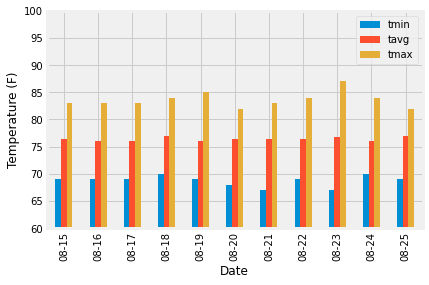

In [36]:
# Plot the daily normals as an area plot with `stacked=False`
trip_df.plot.bar()
plt.ylabel("Temperature (F)")
plt.ylim(60,100)
plt.show()